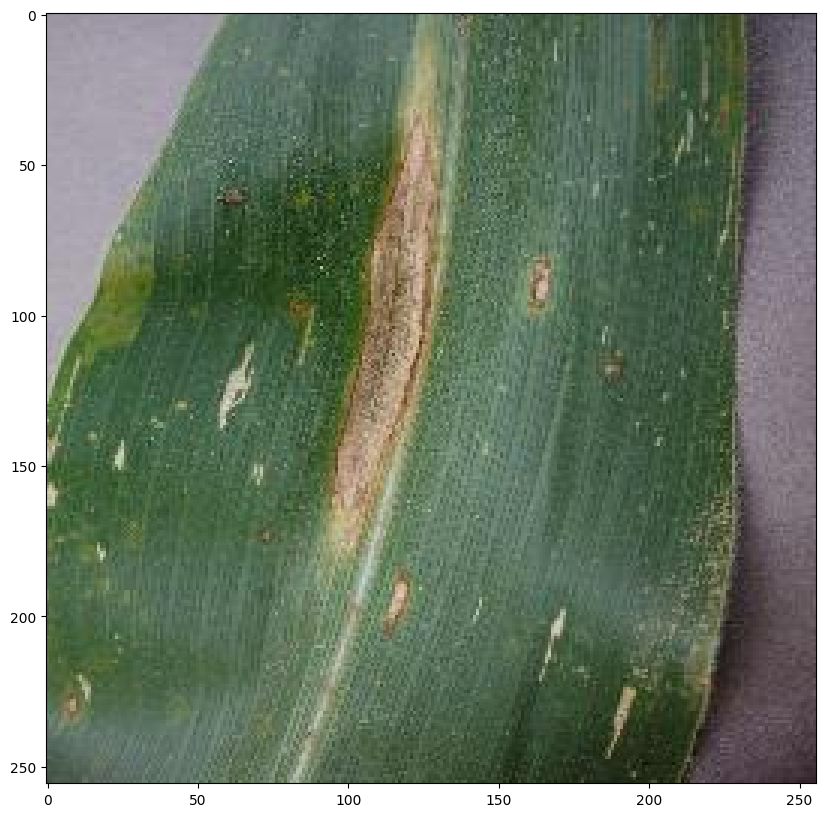

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = '../data/Blight/Corn_Blight (223).JPG'
cv2image = cv2.imread(image)

def show_image(image):
    if image.ndim > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

show_image(cv2image)

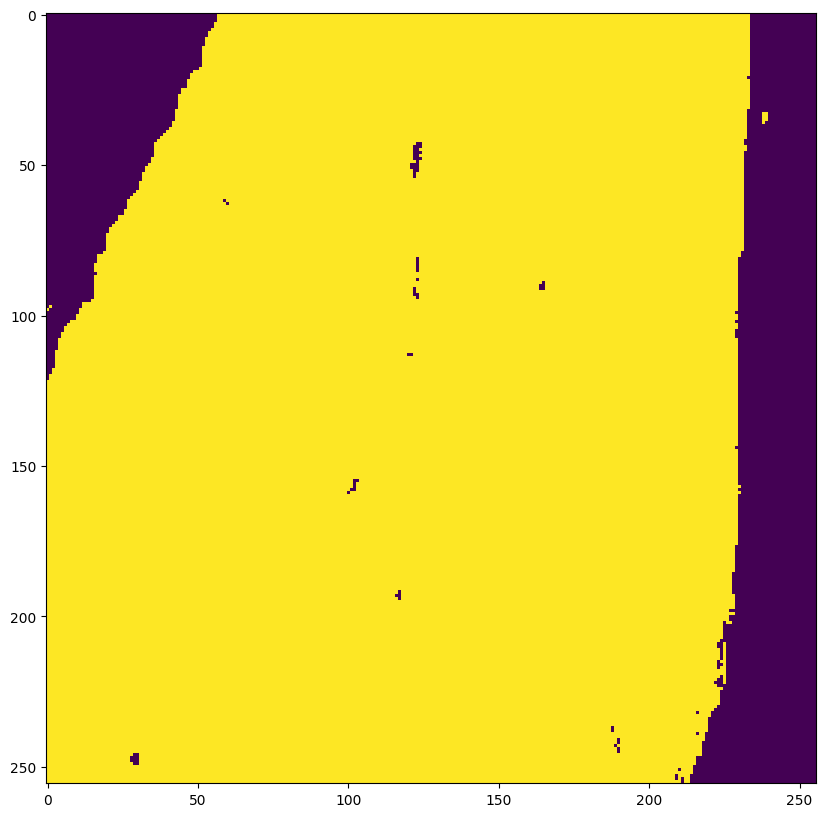

In [139]:
hsv = cv2.cvtColor(cv2image, cv2.COLOR_BGR2HSV)
mask_green = cv2.inRange(hsv, (36,0,0), (86,255,255)) # green
mask_brown = cv2.inRange(hsv, (8, 60, 20), (30, 255, 200)) # brown
mask_yellow = cv2.inRange(hsv, (14, 20, 55), (40, 255, 255)) # yellow

mask = cv2.bitwise_or(mask_green, mask_brown)
mask = cv2.bitwise_or(mask, mask_yellow)

show_image(mask)

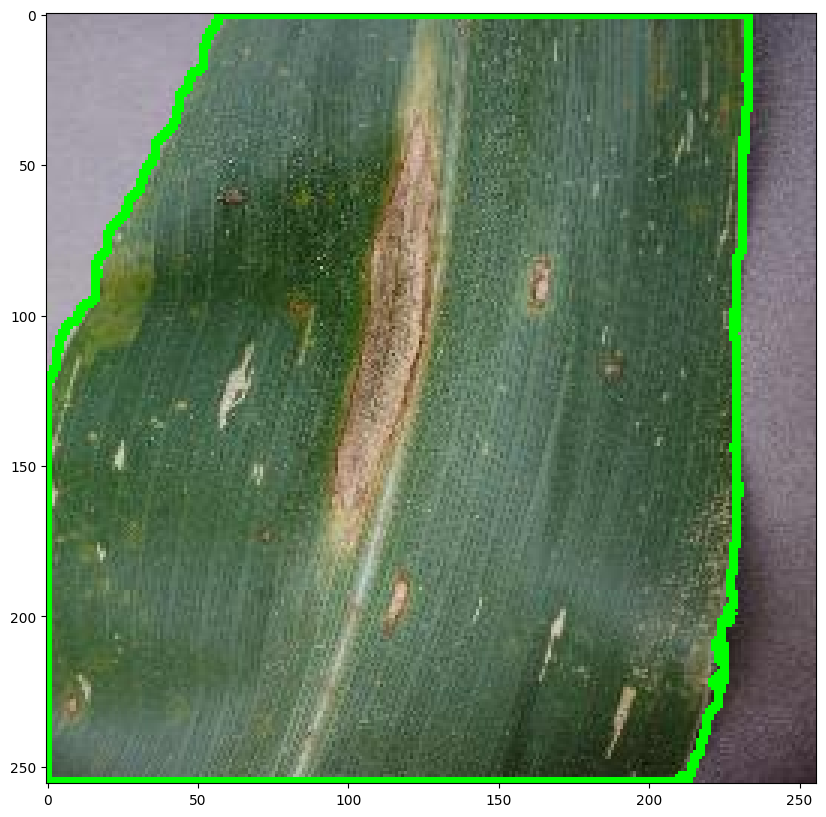

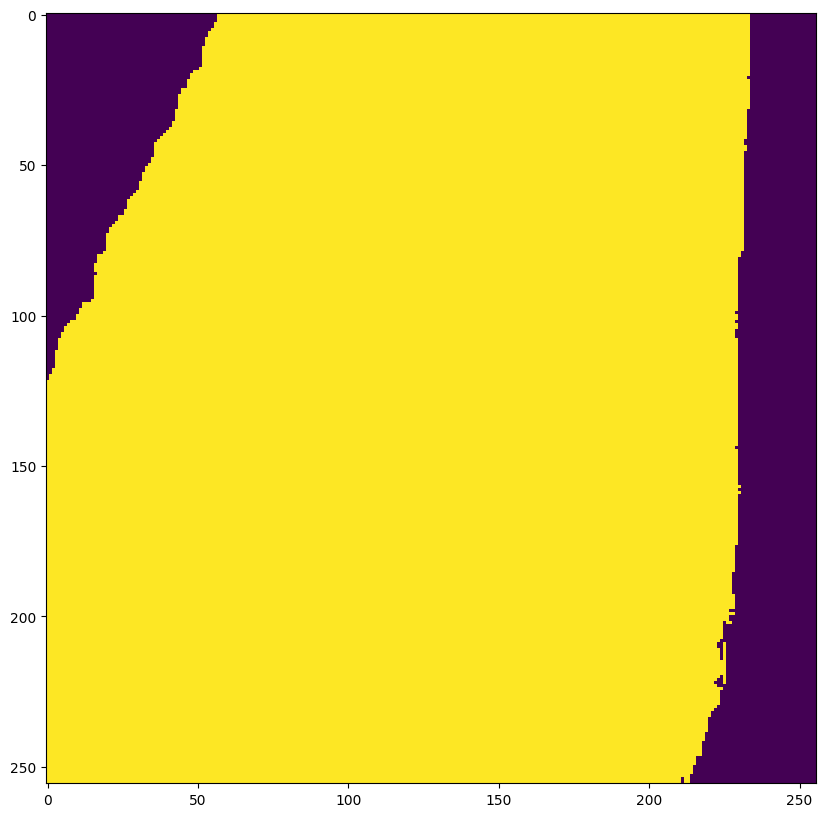

In [143]:
# add 20 pixels of padding to the mask
mask = cv2.copyMakeBorder(mask, 20, 20, 20, 20, cv2.BORDER_CONSTANT, value=0)
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = [c - [20, 20] for c in contours]
mask = mask[20:-20, 20:-20]

copy = cv2image.copy()
contours = [c for c in contours if cv2.contourArea(c) > 100]
cv2.drawContours(copy, contours, -1, (0, 255, 0), 2)
show_image(copy)

# apply contour mask
mask = np.zeros_like(mask)
cv2.drawContours(mask, contours, -1, 255, -1)
show_image(mask)

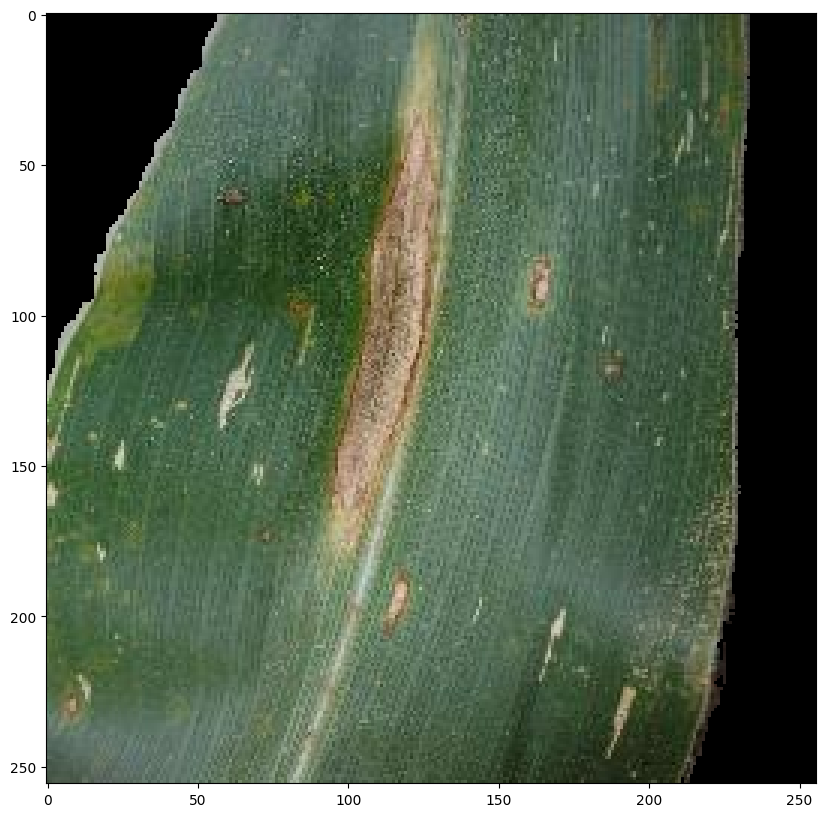

In [144]:
result = cv2.bitwise_and(cv2image, cv2image, mask=mask)
show_image(result)

In [29]:
masked_image_path = "../segdata/" + "/".join(image.split("/")[2:])
cv2.imwrite(masked_image_path, result)

../segdata/Blight/Corn_Blight (223).JPG


True

In [3]:
# for i in range(49, 561):
for i in range(224, 1095):
    # image = f'../data/Gray_Leaf_Spot/Corn_Gray_Spot ({i}).jpg'
    image = f'../data/Blight/Corn_Blight ({i}).JPG'
    print(image)
    cv2image = cv2.imread(image)
    if cv2image is None:
        # image = f'../data/Gray_Leaf_Spot/Corn_Gray_Spot ({i}).jpg' 
        image = f'../data/Blight/Corn_Blight ({i}).jpg'
        cv2image = cv2.imread(image) 
        if cv2image is None:
            continue
    hsv = cv2.cvtColor(cv2image, cv2.COLOR_BGR2HSV)
    mask_green = cv2.inRange(hsv, (36,0,0), (86,255,255)) # green
    mask_brown = cv2.inRange(hsv, (8, 60, 20), (30, 255, 200)) # brown
    mask_yellow = cv2.inRange(hsv, (14, 20, 64), (40, 255, 255)) # yellow

    mask = cv2.bitwise_or(mask_green, mask_brown)
    mask = cv2.bitwise_or(mask, mask_yellow)

    mask = cv2.copyMakeBorder(mask, 20, 20, 20, 20, cv2.BORDER_CONSTANT, value=0)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = [c - [20, 20] for c in contours]
    mask = mask[20:-20, 20:-20]

    copy = cv2image.copy()
    contours = [c for c in contours if cv2.contourArea(c) > 100]
    cv2.drawContours(copy, contours, -1, (0, 255, 0), 2)
    mask = np.zeros_like(mask)
    cv2.drawContours(mask, contours, -1, 255, -1)


    # for y in range(cv2image.shape[0]):
    #     start = None
    #     end = None
    #     for x in range(cv2image.shape[1]):
    #         if mask[y, x] > 0:
    #             if start is None:
    #                 start = x
    #             else:
    #                 end = x
    #     if start is None or end is None:
    #         continue
    #     for x in range(cv2image.shape[1]):
    #         if x > start and x < end:
    #             mask[y, x] = 255
    res = cv2.bitwise_and(cv2image,cv2image, mask=mask)
    masked_image_path = "../segdata/" + "/".join(image.split("/")[2:])

    cv2.imwrite(masked_image_path, res)
    print(f"Saved {masked_image_path}")

../data/Blight/Corn_Blight (1).JPG
Saved ../segdata/Blight/Corn_Blight (1).JPG
../data/Blight/Corn_Blight (2).JPG
Saved ../segdata/Blight/Corn_Blight (2).JPG
../data/Blight/Corn_Blight (3).JPG
Saved ../segdata/Blight/Corn_Blight (3).JPG
../data/Blight/Corn_Blight (4).JPG
Saved ../segdata/Blight/Corn_Blight (4).JPG
../data/Blight/Corn_Blight (5).JPG
Saved ../segdata/Blight/Corn_Blight (5).JPG
../data/Blight/Corn_Blight (6).JPG
Saved ../segdata/Blight/Corn_Blight (6).JPG
../data/Blight/Corn_Blight (7).JPG
Saved ../segdata/Blight/Corn_Blight (7).JPG
../data/Blight/Corn_Blight (8).JPG
Saved ../segdata/Blight/Corn_Blight (8).JPG
../data/Blight/Corn_Blight (9).JPG
Saved ../segdata/Blight/Corn_Blight (9).JPG
../data/Blight/Corn_Blight (10).JPG
Saved ../segdata/Blight/Corn_Blight (10).JPG
../data/Blight/Corn_Blight (11).JPG
Saved ../segdata/Blight/Corn_Blight (11).JPG
../data/Blight/Corn_Blight (12).JPG
Saved ../segdata/Blight/Corn_Blight (12).JPG
../data/Blight/Corn_Blight (13).JPG
Saved ../s